In [1]:
import numpy as np

import autoencoder
import visualization

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
image_size = (152, 152)

normal_dir = "../dataset/AUTO_Input/train/"
anomaly_dir = "../dataset/AUTO_Input/test/"

normal_images = autoencoder.create_image_dataset(normal_dir, image_size)
anomaly_images = autoencoder.create_image_dataset(anomaly_dir, image_size)

Found 209 files.
Found 65 files.


In [3]:
ae = autoencoder.build_and_compile(image_size)
ae.summary()

(38, 38, 32)
46208


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 152, 152, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 152, 152, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 152, 152, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 76, 76, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 76, 76, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 76, 76, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 38, 38, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    47,318,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 46208)          │    47,363,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 76, 76, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 152, 152, 32)   │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 152, 152, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,720,227 (361.33 MB)

 Trainable params: 94,720,099 (361.33 MB)

 Non-trainable params: 128 (512.00 B)

In [4]:
ae_normal_set, ml_normal_set = train_test_split(normal_images, test_size=0.2)
ae_anomaly_set, ml_anomaly_set = train_test_split(anomaly_images, test_size=0.2)

ae_train_set, ae_test_set = train_test_split(ae_normal_set, test_size=0.2)

In [5]:
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_delta=0.0005)
early_stop = EarlyStopping(monitor="val_loss", patience=5, min_delta=0.0002, restore_best_weights=True)
callbacks = [reduce_lr, early_stop]

history = autoencoder.fit_model(ae, ae_train_set, epochs=25, batch_size=32, callbacks=callbacks)

Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - loss: 0.0770 - val_loss: 0.0583 - learning_rate: 5.0000e-04
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 0.0043 - val_loss: 0.0529 - learning_rate: 5.0000e-04
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - loss: 0.0036 - val_loss: 0.0456 - learning_rate: 5.0000e-04
Epoch 4/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0029 - val_loss: 0.0360 - learning_rate: 5.0000e-04
Epoch 5/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 62s 2s/step - loss: 0.0026 - val_loss: 0.0331 - learning_rate: 5.0000e-04
Epoch 6/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - loss: 0.0023 - val_loss: 0.0248 - learning_rate: 5.0000e-04
Epoch 7/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - loss: 0.0020 - val_loss: 0.0220 - learning_rate: 5.0000e-04
Epoch 8/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - loss: 0.0019 - val_loss: 0.0143 - learning_rate: 5.0000e-04
Epoch 9/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - loss: 0.0017 - val_loss: 0.0106 - learning_rate: 5.0

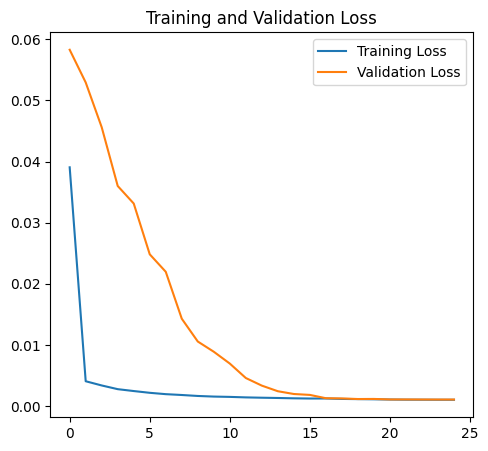

In [6]:
visualization.plot_metrics(history, accuracy=False)

In [7]:
ae.save("./model.keras")